### Decision Tree Exercises

In [244]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import acquire
import prepare
import warnings as warn
warn.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [245]:
# Use titanic data
train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data())
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,0,0,9.8375,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0
573,1,3,0,0,7.7500,1,0,1,0
110,0,1,0,0,52.0000,1,1,0,1
167,0,3,1,4,27.9000,0,0,0,1


#### 1. What is your baseline prediction? What is your baseline accuracy? 

In [246]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode).
Based on that, the baseline would be not survived i.e. survived = 0.

In [247]:
train['baseline'] = 0

In [248]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
474,0,3,0,0,9.8375,1,0,0,1,0
370,1,1,1,0,55.4417,0,1,0,0,0
573,1,3,0,0,7.7500,1,0,1,0,0
110,0,1,0,0,52.0000,1,1,0,1,0
167,0,3,1,4,27.9000,0,0,0,1,0


In [249]:
# baseline accuracy

baseline_accuracy = (train['survived'] == train['baseline']).mean()
print(f'Baseline Accuracy is {baseline_accuracy:.2%}')

Baseline Accuracy is 61.65%


In [250]:
# drop the baseline column 

train = train.drop(columns='baseline')

#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [251]:
# assign our x and y variables for train and validate datasets
X_cols = ['pclass', 'alone', 'sex_male','embark_town_Queenstown', 'embark_town_Southampton']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [252]:
# Create Decision Tree object
model1 = DecisionTreeClassifier(max_depth=2, random_state = 149)

# fit the model to training data
model1.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=149)

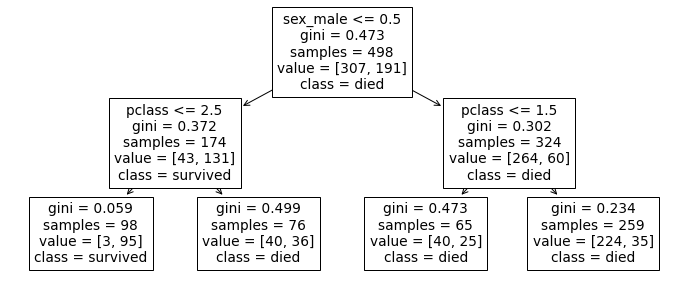

In [253]:
plt.figure(figsize = (12,5))
# interpret + visualize model
plot_tree(model1, feature_names=X_train.columns.tolist(), 
          class_names= ['died', 'survived'])
plt.show()

In [155]:
# to make predictions
y_pred = model1.predict(X_train)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [116]:
yv_pred = model1.predict(X_validate)
yv_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [254]:
# training split score
print(f'training score: {model1.score(X_train, y_train):.2%}')

training score: 80.12%


In [256]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 'predicted survived'])

,predicted died,predicted survived
actual died,304,3
actual survived,96,95


In [257]:
target_names = ['actual', 'predicted']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      actual       0.76      0.99      0.86       307
   predicted       0.97      0.50      0.66       191

    accuracy                           0.80       498
   macro avg       0.86      0.74      0.76       498
weighted avg       0.84      0.80      0.78       498



#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [123]:
# validate split accuracy
vs = (validate.survived == validate.prediction).mean()
vs

0.7616822429906542

In [261]:
# validate split model score
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

validate score: 76.17%


In [262]:
yv_pred = model1.predict(X_validate)

In [263]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_validate, yv_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 'predicted survived'])

,predicted died,predicted survived
actual died,128,4
actual survived,47,35


In [264]:
# classification report of validate dataset
target_names = ['actual', 'predicted']
print(classification_report(y_validate, yv_pred, target_names=target_names))

              precision    recall  f1-score   support

      actual       0.73      0.97      0.83       132
   predicted       0.90      0.43      0.58        82

    accuracy                           0.76       214
   macro avg       0.81      0.70      0.71       214
weighted avg       0.80      0.76      0.74       214



#### 5. Run through steps 2-4 using a different max_depth value.

In [265]:
# Create Decision Tree object
model2 = DecisionTreeClassifier(max_depth=3, random_state = 149)

# fit the model to training data
model2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=149)

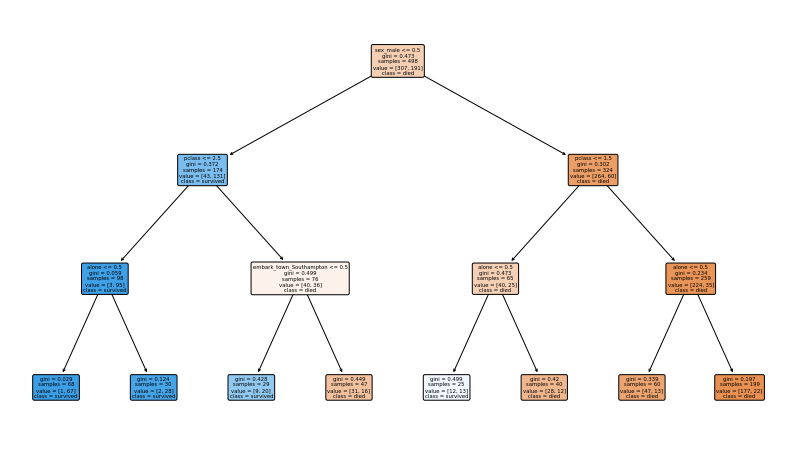

In [266]:
plt.figure(figsize = (14,8))
# interpret + visualize model
plot_tree(model2, feature_names=X_train.columns.tolist(), 
          class_names= ['died', 'survived'],filled=True, rounded=True)
plt.show()

In [267]:
# training split score
print(f'training score: {model2.score(X_train, y_train):.2%}')

training score: 82.53%


In [268]:
# validate split model score
print(f'validate score: {model2.score(X_validate, y_validate):.2%}')

validate score: 75.70%


In [269]:
y_pred2 = model2.predict(X_train)
y_pred2

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [270]:
yv_pred2 = model2.predict(X_validate)
yv_pred2

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [271]:
# Confusion matrix with predictions using train
pd.DataFrame(confusion_matrix(y_train, y_pred2, labels=(0, 1)),
             index=['acutal died', 'actual survived'], columns=['predicted died', 'predicted survived'])

,predicted died,predicted survived
acutal died,283,24
actual survived,63,128


In [274]:
# Confusion matrix with predictions using validate
pd.DataFrame(confusion_matrix(y_validate, yv_pred2, labels=(0, 1)),
             index=['acutal died', 'actual survived'], columns=['predicted died', 'predicted survived'])

,predicted died,predicted survived
acutal died,114,18
actual survived,34,48


In [273]:
# classification report of train dataset for model 2
target_names = ['actual', 'predicted']
print(classification_report(y_train, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

      actual       0.82      0.92      0.87       307
   predicted       0.84      0.67      0.75       191

    accuracy                           0.83       498
   macro avg       0.83      0.80      0.81       498
weighted avg       0.83      0.83      0.82       498



In [275]:
# classification report of validate dataset for model 2
target_names = ['actual', 'predicted']
print(classification_report(y_validate, yv_pred2, target_names=target_names))

              precision    recall  f1-score   support

      actual       0.77      0.86      0.81       132
   predicted       0.73      0.59      0.65        82

    accuracy                           0.76       214
   macro avg       0.75      0.72      0.73       214
weighted avg       0.75      0.76      0.75       214



#### 6. Which model performs better on your in-sample data?

Model 2 with the higher max depth performs better on training data

#### 7. Which model performs best on your out-of-sample data, the validate set?

Model 1 performs better on validate set

### Random Forest Exercises

#### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [222]:
# Create the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=13)

In [223]:
# fit model to training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=13)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [243]:
print(f'Training Random Forest 1 Sample Accuracy: {rf.score(X_train, y_train):.2%}')

Training Random Forest 1 Sample Accuracy: 82.53%


In [225]:
y_rf_pred = rf.predict(X_train)

In [226]:
# to make confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_rf_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 'predicted survived'])

,predicted died,predicted survived
actual died,291,16
actual survived,71,120


In [227]:
# classification report
print(classification_report(y_train, y_rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       307
           1       0.88      0.63      0.73       191

    accuracy                           0.83       498
   macro avg       0.84      0.79      0.80       498
weighted avg       0.83      0.83      0.82       498



#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [242]:
print(f'Random Forest 1 Validate Accuracy: {rf.score(X_validate, y_validate):.2%}')

Random Forest 1 Validate Accuracy: 76.17%


In [229]:
yv_rf_pred = rf.predict(X_validate)

In [230]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_validate, yv_rf_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 'predicted survived'])

,predicted died,predicted survived
actual died,116,16
actual survived,35,47


In [231]:
# classification report
print(classification_report(y_validate, yv_rf_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       132
           1       0.75      0.57      0.65        82

    accuracy                           0.76       214
   macro avg       0.76      0.73      0.73       214
weighted avg       0.76      0.76      0.75       214



#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [233]:
# create model with increased min samples leaf and reduced max depth
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=4, 
                            random_state=13)

In [234]:
# fit model to training data
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=4, random_state=13)

In [235]:
print(f'Training Sample Accuracy: {rf2.score(X_train, y_train):.2%}')

Training Sample Accuracy: 82.33%


In [203]:
y_rf2_pred = rf2.predict(X_train)

In [236]:
pd.DataFrame(confusion_matrix(y_train, y_rf2_pred, labels=(0,1)),
                index=['actual died','actual survived'],
                columns = ['predicted died', 'predicted survived'])

,predicted died,predicted survived
actual died,283,24
actual survived,63,128


In [237]:
print(classification_report(y_train, y_rf2_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       307
           1       0.84      0.67      0.75       191

    accuracy                           0.83       498
   macro avg       0.83      0.80      0.81       498
weighted avg       0.83      0.83      0.82       498



In [238]:
# now check the score with validate set for model 2
print(f"Random forest 2 validate sample accuracy:  {rf2.score(X_validate, y_validate):.2%}")

Random forest 2 validate sample accuracy:  78.04%


In [239]:
# predictions to use in confusion matrix and classification report
yv_rf2_pred = rf2.predict(X_validate)

In [240]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_validate, yv_rf2_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 
                           'predicted survived'])

,predicted died,predicted survived
actual died,122,10
actual survived,37,45


In [241]:
# classification report
print(classification_report(y_validate, yv_rf2_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       132
           1       0.82      0.55      0.66        82

    accuracy                           0.78       214
   macro avg       0.79      0.74      0.75       214
weighted avg       0.79      0.78      0.77       214



#### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?


- Model 2 performs better on out of sample data
- Precision, recall and f1 scores are higher for model 1
- Model 1 with lower min sample leaf and higher max depth performs slightly better on in sample data than Model 2 because it is overfit to the training data

#### 6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

Model 2 